# (sFigure4)-Data Integration of NK/T Cells.

In [1]:
import omicverse as ov 
import scanpy as sc
import anndata as ad
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 


   ____            _     _    __                  
  / __ \____ ___  (_)___| |  / /__  _____________ 
 / / / / __ `__ \/ / ___/ | / / _ \/ ___/ ___/ _ \ 
/ /_/ / / / / / / / /__ | |/ /  __/ /  (__  )  __/ 
\____/_/ /_/ /_/_/\___/ |___/\___/_/  /____/\___/                                              

Version: 1.5.9, Tutorials: https://omicverse.readthedocs.io/


In [2]:
import os
from matplotlib import rcParams
from matplotlib.font_manager import FontProperties

font_path = 'Gastric/Arial.ttf'
front_prop = FontProperties(fname=font_path)
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=80, facecolor='white')

In [3]:
adata = sc.read_h5ad("Gastric/Data/Gastric_NKT_anno_new.h5ad")
adata = adata[adata.obs['T/NK_celltype']!='CD4.Tem']
type_color_rna={
    'CD8.Mait':'#81B330',
    'CD8.Tem':'#249F3A',
    'CD8.Trm':'#0A5D2F',
    'CD8.Tea':'#BCCE85',
    'CD4.Treg':'#F3C5C7',
    'CD4.Trm':'#E1635E',
    'CD4.Tfh':'#89428F',
    'CD4.Tn':'#F2BC1D',
    'CD4.Th17':'#D41661',
  #  'CD4.Tem':'#D2890B',
    'NK.CD56_Bright':'#31829F',
    'NK.CD56_Dim':'#6BBBDA',
    'Cycling.T':'#4D4F95'
}
adata.uns['T/NK_celltype_colors']=adata.obs['T/NK_celltype'].cat.categories.map(type_color_rna).values.tolist()
adata

AnnData object with n_obs × n_vars = 13867 × 2000
    obs: 'Group_number', 'Sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_scvi_batch', '_scvi_labels', 'leiden', 'major_celltype', 'Person', 'T/NK_celltype', 'T/NK_type'
    uns: 'Person_colors', 'Sample_colors', 'T', 'dendrogram_T', 'leiden', 'leiden_sizes', 'neighbors', 'paga', 'umap', 'T/NK_celltype_colors'
    obsm: 'X_pca', 'X_scVI', 'X_umap'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

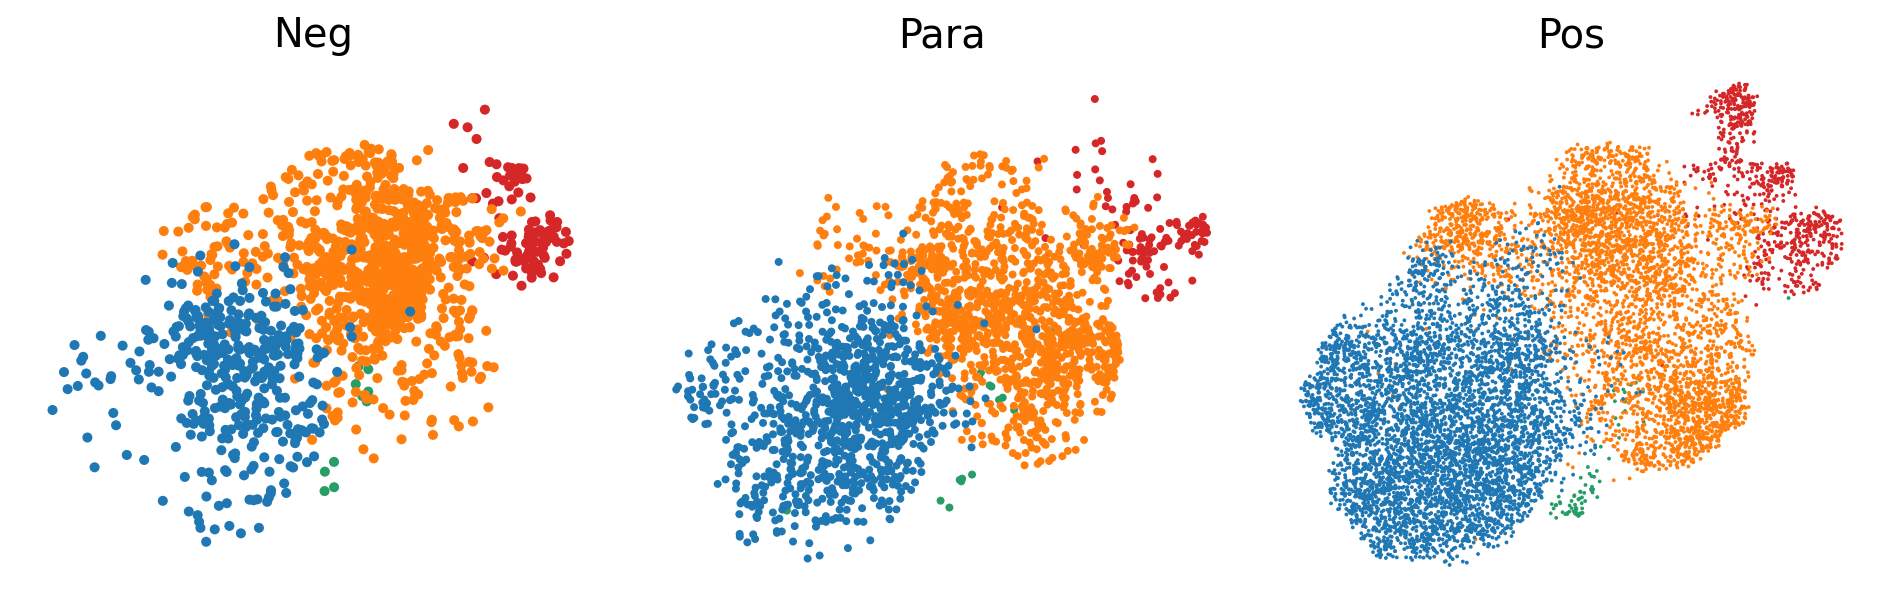

In [11]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4), sharex=True, sharey=True)

for j, ax in enumerate(axes):
    axes = ov.utils.embedding(adata[adata.obs['Sample']==sorted(list(set(adata.obs['Sample'])))[j]],
                               basis='X_umap',
                               color=['T/NK_type'],
                               title=sorted(list(set(adata.obs['Sample'])))[j],
                               frameon=False,
                               show=False,cmap='RdBu_r',
                               legend_loc=False,
                               ax=ax)
    axes.set_title(sorted(list(set(adata.obs['Sample'])))[j],fontdict={'size':18})
plt.tight_layout()

# 显示图形
plt.savefig('Gastric/Figure/sFigure4/sFigure4_A.png', dpi=300)

plt.show()


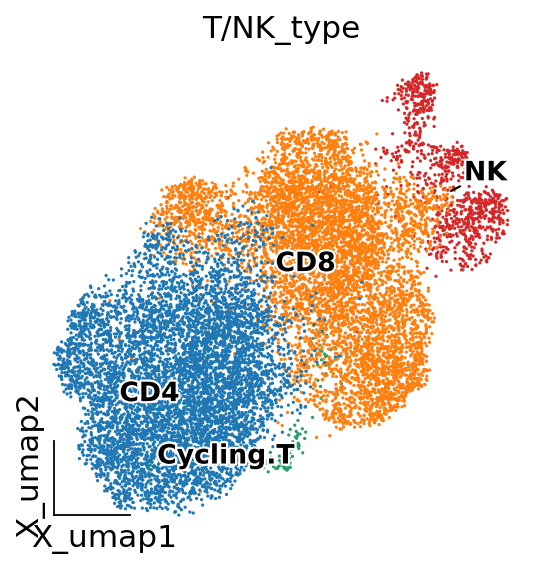

In [9]:
from matplotlib import patheffects
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(4,4))

ov.pl.embedding(adata,
                  basis='X_umap',
                  color=['T/NK_type'],cmap='RdBu_r',
                   show=False, legend_loc=None, add_outline=False, 
                   frameon='small',legend_fontoutline=2,ax=ax
                 )

ov.pl.embedding_adjust(
    adata,
    groupby='T/NK_type',
    exclude=("OL",),  
    basis='X_umap',
    ax=ax,
    adjust_kwargs=dict(arrowprops=dict(arrowstyle='-', color='black')),
    text_kwargs=dict(fontsize=12 ,weight='bold',
                     path_effects=[patheffects.withStroke(linewidth=2, foreground='w')] ),
)
plt.savefig("Gastric/Figure/sFigure4/sFigure4_B.png",dpi=300,bbox_inches = 'tight')

In [14]:
import anndata as ad
adata_CD8 = sc.read_h5ad('Gastric/Data/NKT/CD8_anno_new.h5ad')
adata_CD4 = sc.read_h5ad('Gastric/Data/NKT/CD4_anno_new.h5ad')
adata_CD4,adata_CD8

(AnnData object with n_obs × n_vars = 6816 × 2000
     obs: 'Group_number', 'Sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_scvi_batch', '_scvi_labels', 'leiden', 'major_celltype', 'Person', 'T/NK_celltype', 'T/NK_type', 'Subcelltype'
     uns: 'Person_colors', 'Sample_colors', 'Subcelltype_colors', 'T', 'dendrogram_T', 'dendrogram_leiden', 'leiden', 'leiden_colors', 'leiden_sizes', 'neighbors', 'paga', 'umap'
     obsm: 'X_pca', 'X_scVI', 'X_umap'
     layers: 'counts'
     obsp: 'connectivities', 'distances',
 AnnData object with n_obs × n_vars = 6184 × 2000
     obs: 'Group_number', 'Sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_scvi_batch', '_scvi_labels', 'leiden', 'major_celltype', 'Person', 'T/NK_celltype', 'T/NK_type', 'Subcelltype'
     uns: 'Person_colors', 'Sample_colors', 'Subcelltype_colors', 'T', 'dendrogram_T', 'dendrogram_leiden', 'leiden', 'leiden_sizes', 'neighbors', 'paga

In [19]:
type_color_rna={
    'CD8.CXCL13+.Termianl_Tex':'C4.CD8.CXCL13+.Termianl_Tex',
    'CD8.FOS+IL7R+.T-early_response':'C6.CD8.FOS+IL7R+.T-early_response',
    'CD8.FOS+JUN+.T-early_response':'C5.CD8.FOS+JUN+.T-early_response',
    'CD8.GZMK+.Tem':'C3.CD8.GZMK+.Tem',
    'CD8.GZMK+.Tn':'C1.CD8.GZMK+.Tn',
    'CD8.GZMK+.early_Tem':'C2.CD8.GZMK+.early_Tem',
    'CD8.ISG+.T':'C7.CD8.ISG+.T',
    'CD8.KLRD1+TYROBP+.NK-like':'C11.CD8.KLRD1+TYROBP+.NK-like',
    'CD8.MAIT':'C8.CD8.MAIT',
    'CD8.ZNF683+CXCR6+.Trm':'C9.CD8.ZNF683+CXCR6+.Trm',
    'CD8.ZNF683+CXCR6-.Trm':'C10.CD8.ZNF683+CXCR6-.Trm',
    'CD8.ZNF683-CXCR6+.Trm':'C12.CD8.ZNF683-CXCR6+.Trm',
}
adata_CD8.obs['Subcelltype_ID_type']=adata_CD8.obs['Subcelltype'].map(type_color_rna).astype('category')
adata_CD8.uns['Subcelltype_ID_type_colors']=adata_CD8.uns['Subcelltype_colors']

type_color_rna={
    'CD4.CAPG+.Tm':'C3.CD4.CAPG+.Tm',
    'CD4.CAPG+CREM-.Tm':'C4.CD4.CAPG+CREM-.Tm',
    'CD4.ADSL+.Tn':'C6.CD4.ADSL+.Tn',
    'CD4.IL21+.Tfh':'C7.CD4.IL21+.Tfh',
    'CD4.IL26+.Th17':'C9.CD4.IL26+.Th17',
    'CD4.LAG3+.Treg':'C10.CD4.LAG3+.Treg',
    'CD4.TNF+.T':'C2.CD4.TNF+.T',
    'CD4.TNFRSF9+.Treg':'C11.CD4.TNFRSF9+.Treg',
    'CD4.TOX2+.Tfh':'C8.CD4.TOX2+.Tfh',
    'CD4.Tn':'C1.CD4.Tn',
    'CD4.TMP1+.Tm':'C5.CD4.TMP1+.Tm',
}
adata_CD4.obs['Subcelltype_ID_type']=adata_CD4.obs['Subcelltype'].map(type_color_rna).astype('category')
adata_CD4.uns['Subcelltype_ID_type_colors']=adata_CD4.uns['Subcelltype_colors']

adata_CD4,adata_CD8

(AnnData object with n_obs × n_vars = 6816 × 2000
     obs: 'Group_number', 'Sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_scvi_batch', '_scvi_labels', 'leiden', 'major_celltype', 'Person', 'T/NK_celltype', 'T/NK_type', 'Subcelltype', 'Patient_ID', 'Subcelltype_ID_type'
     uns: 'Person_colors', 'Sample_colors', 'Subcelltype_colors', 'T', 'dendrogram_T', 'dendrogram_leiden', 'leiden', 'leiden_colors', 'leiden_sizes', 'neighbors', 'paga', 'umap', 'Subcelltype_ID_type_colors'
     obsm: 'X_pca', 'X_scVI', 'X_umap'
     layers: 'counts'
     obsp: 'connectivities', 'distances',
 AnnData object with n_obs × n_vars = 6184 × 2000
     obs: 'Group_number', 'Sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_scvi_batch', '_scvi_labels', 'leiden', 'major_celltype', 'Person', 'T/NK_celltype', 'T/NK_type', 'Subcelltype', 'Patient_ID', 'Subcelltype_ID_type'
     uns: 'Person_colors', 'Sample_colors', 'Sub

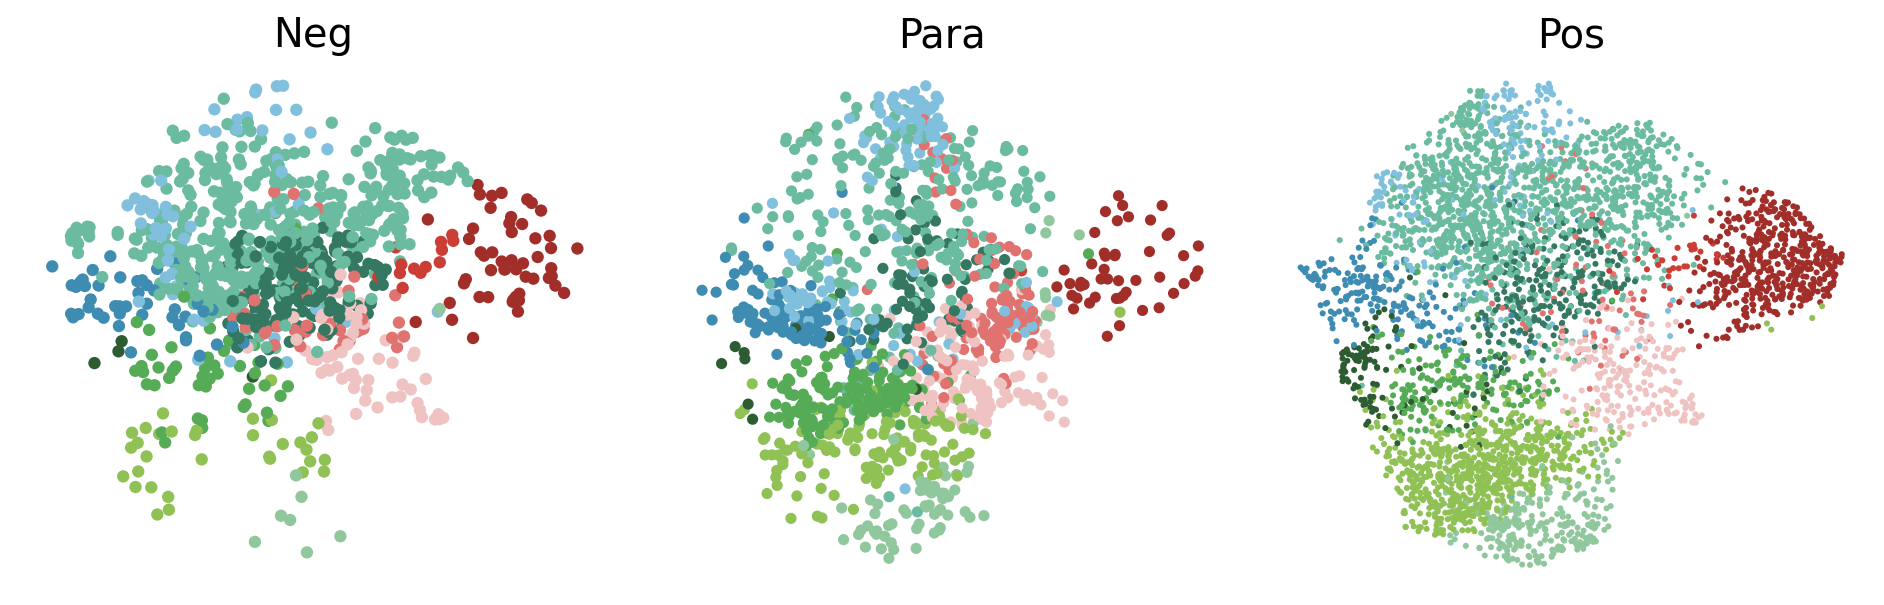

In [20]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4), sharex=True, sharey=True)

for j, ax in enumerate(axes):
    axes = ov.utils.embedding(adata_CD8[adata_CD8.obs['Sample']==sorted(list(set(adata_CD8.obs['Sample'])))[j]],
                               basis='X_umap',
                               color=['Subcelltype_ID_type'],
                               title=sorted(list(set(adata_CD8.obs['Sample'])))[j],
                               frameon=False,
                               show=False,cmap='RdBu_r',
                               legend_loc=False,
                               ax=ax)
    axes.set_title(sorted(list(set(adata_CD8.obs['Sample'])))[j],fontdict={'size':18})
plt.tight_layout()

plt.savefig('Gastric/Figure/sFigure4/sFigure4_C.png', dpi=300)

plt.show()


In [35]:
adata_CD8.obs['Subcelltype_ID_type']

AAACCTGCATCCAACA-1_0                      C3.CD8.GZMK+.Tem
AAACGGGCAATAACGA-1_0              C9.CD8.ZNF683+CXCR6+.Trm
AAAGCAAAGGTAGCTG-1_0              C9.CD8.ZNF683+CXCR6+.Trm
AAAGCAAGTGACTCAT-1_0              C9.CD8.ZNF683+CXCR6+.Trm
AAAGTAGCAGTAAGAT-1_0              C9.CD8.ZNF683+CXCR6+.Trm
                                       ...                
TTTGCGCAGTGAACAT-1_11                     C3.CD8.GZMK+.Tem
TTTGCGCCACTCGACG-1_11               C2.CD8.GZMK+.early_Tem
TTTGCGCGTCCATCCT-1_11    C6.CD8.FOS+IL7R+.T-early_response
TTTGTCACAAGACACG-1_11                     C3.CD8.GZMK+.Tem
TTTGTCAGTGTAACGG-1_11                     C3.CD8.GZMK+.Tem
Name: Subcelltype_ID_type, Length: 6184, dtype: category
Categories (12, object): ['C1.CD8.GZMK+.Tn', 'C2.CD8.GZMK+.early_Tem', 'C3.CD8.GZMK+.Tem', 'C4.CD8.CXCL13+.Termianl_Tex', ..., 'C10.CD8.ZNF683+CXCR6-.Trm', 'C9.CD8.ZNF683+CXCR6+.Trm', 'C12.CD8.ZNF683-CXCR6+.Trm', 'C11.CD8.KLRD1+TYROBP+.NK-like']

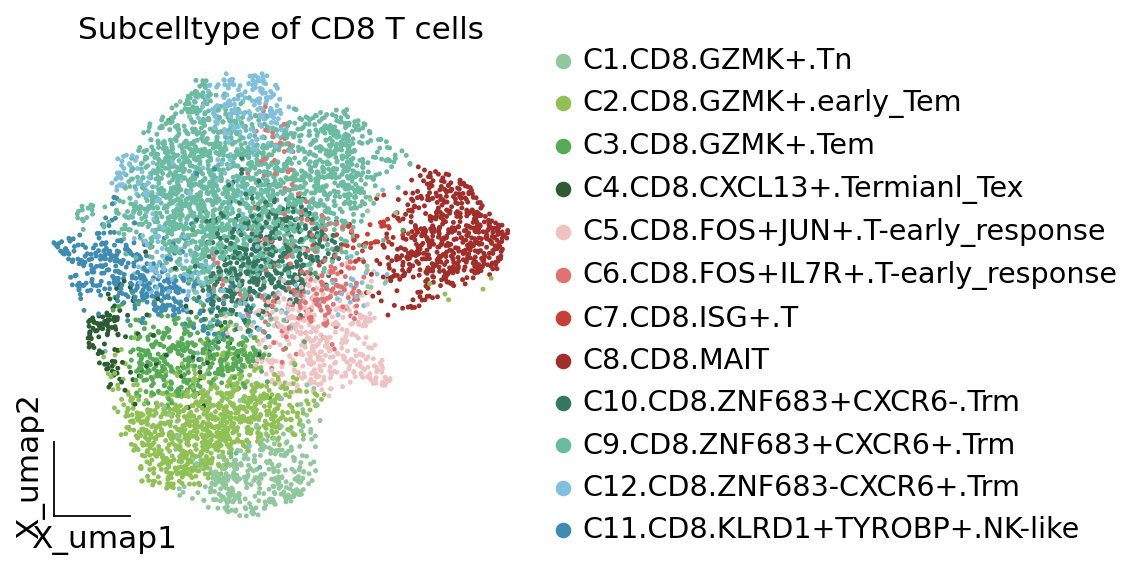

In [22]:
fig, ax = plt.subplots(figsize=(4,4))

ov.pl.embedding(adata_CD8,
                  basis='X_umap',
                  color=['Subcelltype_ID_type'],title='Subcelltype of CD8 T cells',
                   show=False, add_outline=False,cmap='RdBu_r',
                   frameon='small',legend_fontoutline=2,ax=ax
                 )
plt.savefig('Gastric/Figure/sFigure4/sFigure4_D.png', dpi=300,bbox_inches = 'tight')



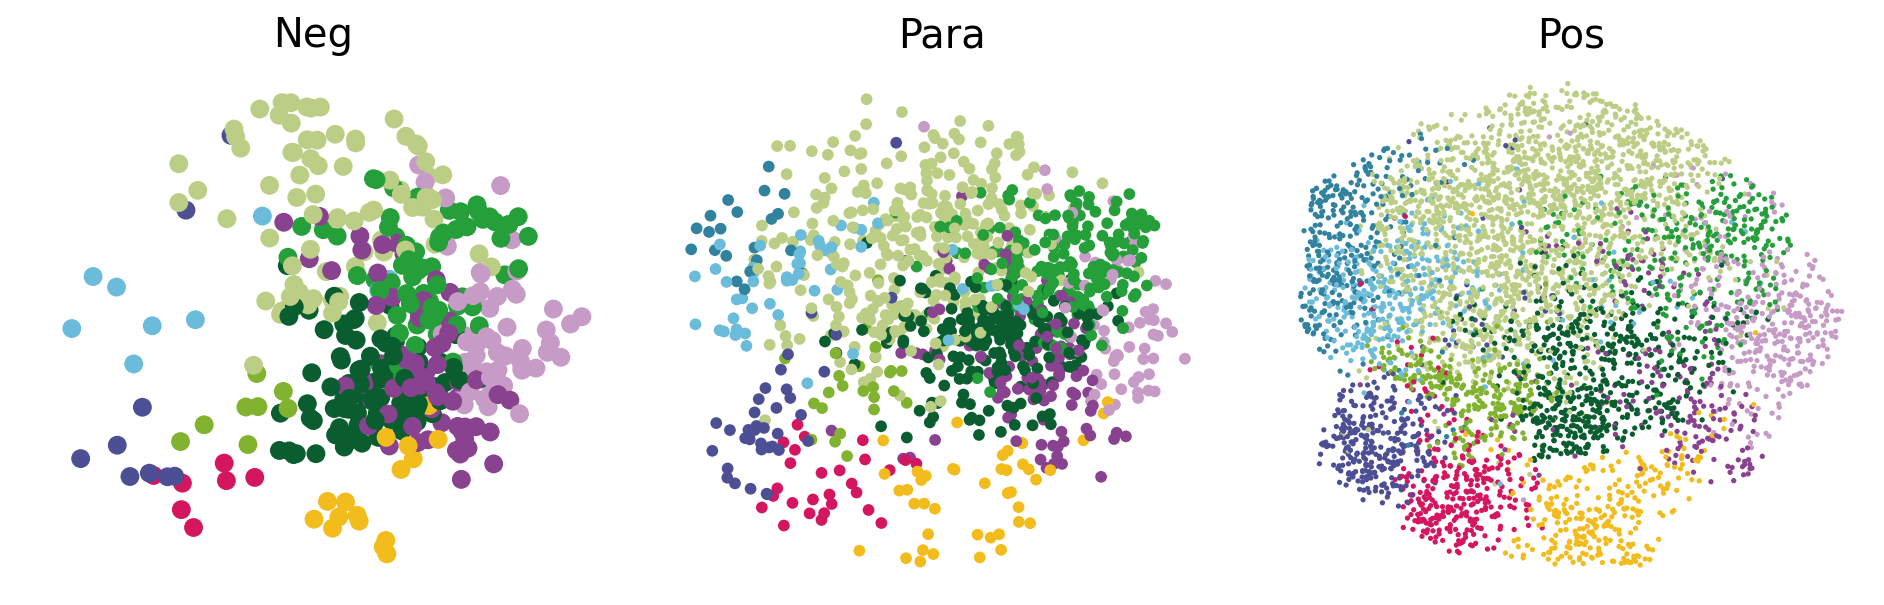

In [21]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4), sharex=True, sharey=True)

for j, ax in enumerate(axes):
    axes = ov.utils.embedding(adata_CD4[adata_CD4.obs['Sample']==sorted(list(set(adata_CD4.obs['Sample'])))[j]],
                               basis='X_umap',
                               color=['Subcelltype'],
                               title=sorted(list(set(adata_CD4.obs['Sample'])))[j],
                               frameon=False,
                               show=False,
                               legend_loc=False,
                               ax=ax)
    axes.set_title(sorted(list(set(adata_CD4.obs['Sample'])))[j],fontdict={'size':18})
plt.tight_layout()

plt.savefig('Gastric/Figure/sFigure4/sFigure4_E.png', dpi=300)

plt.show()


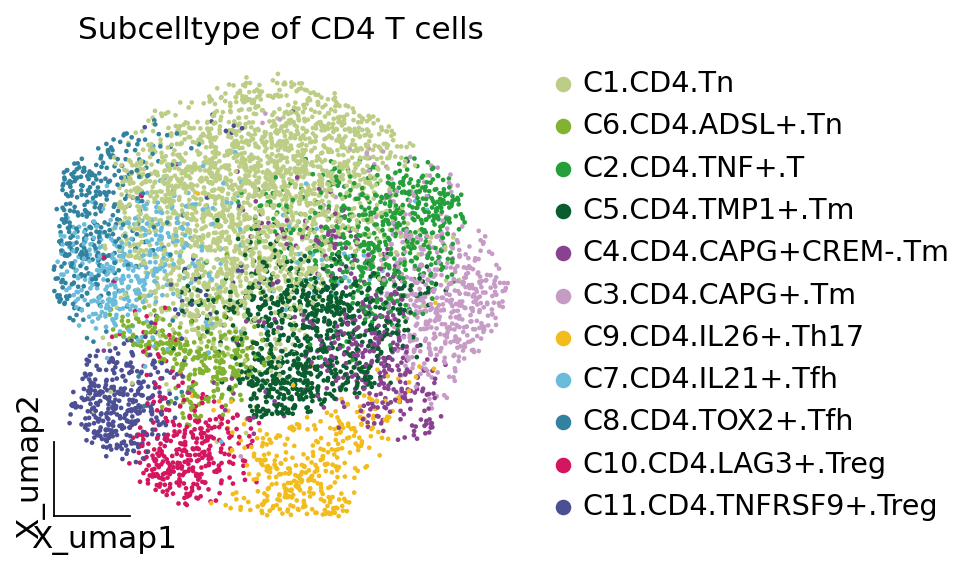

In [23]:
fig, ax = plt.subplots(figsize=(4,4))

ov.pl.embedding(adata_CD4,
                  basis='X_umap',
                  color=['Subcelltype_ID_type'],title='Subcelltype of CD4 T cells',
                   show=False, add_outline=False,cmap='RdBu_r',
                   frameon='small',legend_fontoutline=2,ax=ax,
                 )
plt.savefig('Gastric/Figure/sFigure4/sFigure4_F.png', dpi=300,bbox_inches = 'tight')


In [32]:
adata_CD8.obs['Patient_ID'] = adata_CD8.obs['Person']
adata_CD8.uns['Patient_ID_colors'] = adata_CD8.uns['Person_colors']
adata_CD4.obs['Patient_ID'] = adata_CD4.obs['Person']
adata_CD4.uns['Patient_ID_colors'] = adata_CD4.uns['Person_colors']

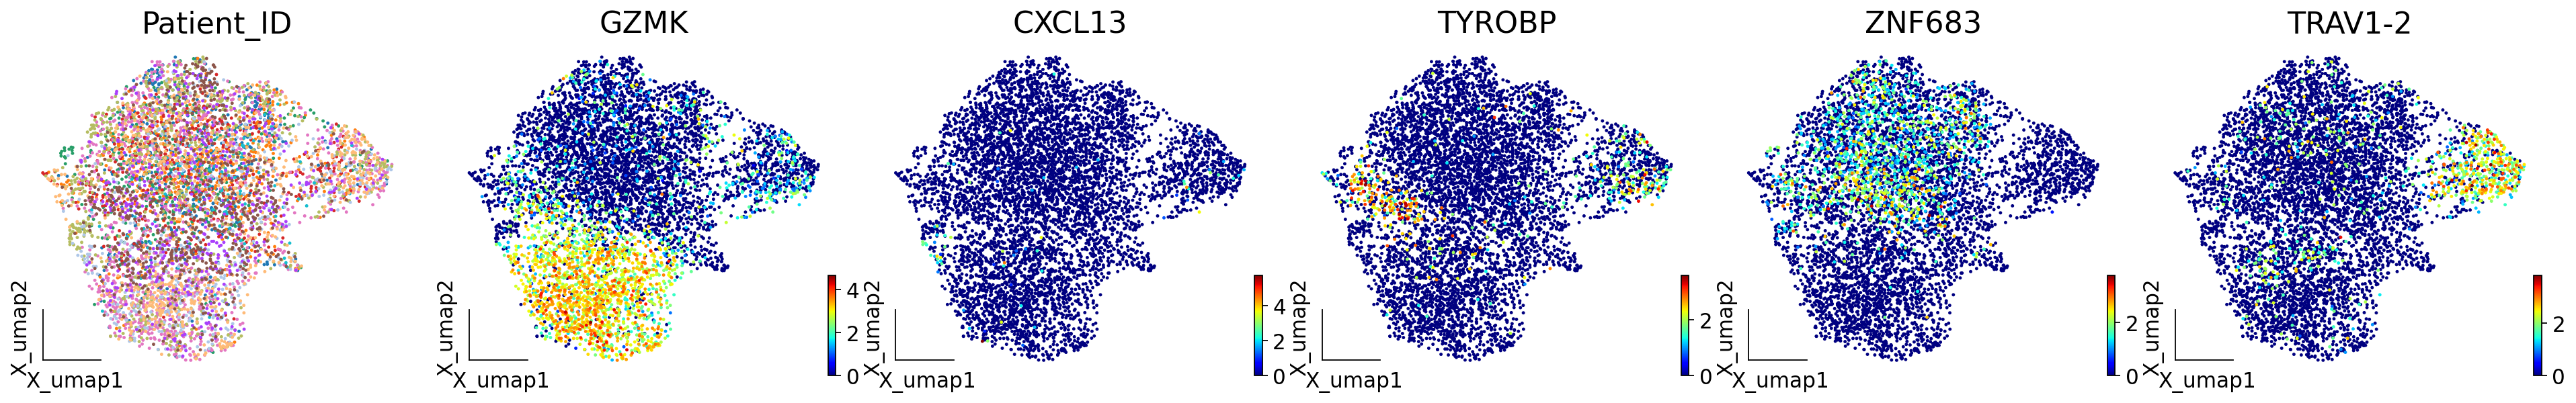

In [13]:
import matplotlib.pyplot as plt
import matplotlib as mpl
fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(24, 4), sharex=True, sharey=True)
all_genes = ['Patient_ID','GZMK','CXCL13','TYROBP','ZNF683','TRAV1-2']
for i, row_axes in enumerate(axes):
    axes = ov.utils.embedding(adata_CD8,
                               basis='X_umap',
                               color=all_genes[i],
                               title=all_genes[i],
                               frameon='small',
                               show=False,
                               legend_loc=False,
                               #colorbar_loc=None,
                               color_map = mpl.cm.get_cmap('jet'),
                               ax=row_axes)
    axes.set_title(all_genes[i],fontdict={'size':20})

plt.tight_layout()
plt.savefig('Gastric/Figure/sFigure4/sFigure4_G.png', dpi=300,bbox_inches = 'tight')
plt.show()


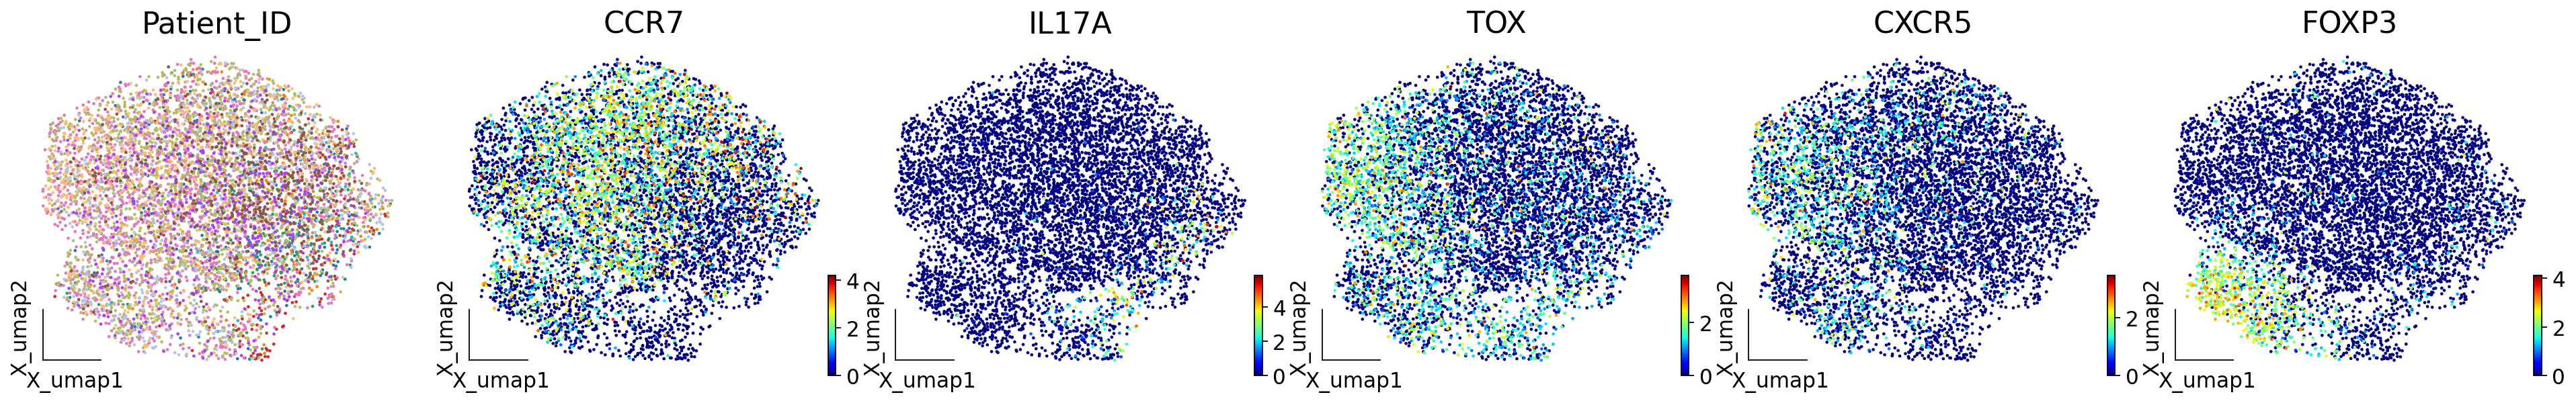

In [14]:
import matplotlib.pyplot as plt
import matplotlib as mpl
fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(24, 4), sharex=True, sharey=True)
all_genes = ['Patient_ID','CCR7','IL17A','TOX','CXCR5','FOXP3']
for i, row_axes in enumerate(axes):
    axes = ov.utils.embedding(adata_CD4,
                               basis='X_umap',
                               color=all_genes[i],
                               title=all_genes[i],
                               frameon='small',
                               show=False,
                               legend_loc=False,
                               #colorbar_loc=None,
                               color_map = mpl.cm.get_cmap('jet'),
                               ax=row_axes)
    axes.set_title(all_genes[i],fontdict={'size':20})

plt.tight_layout()
plt.savefig('Gastric/Figure/sFigure4/sFigure4_H.png', dpi=300)
plt.show()


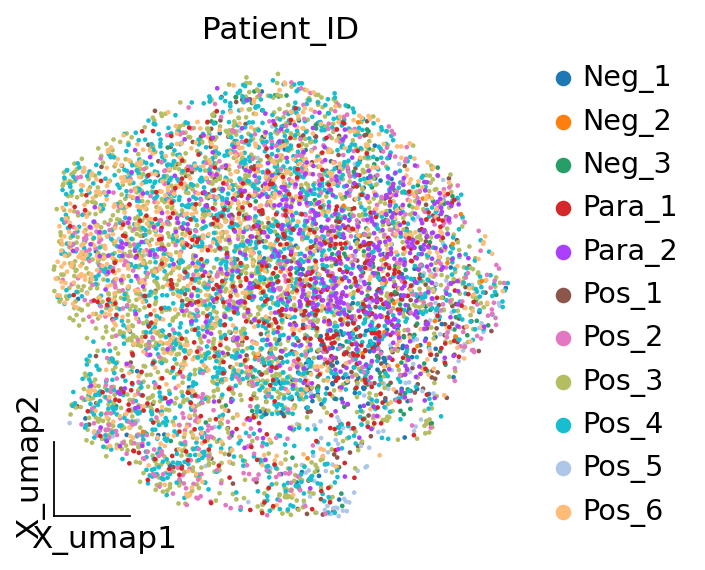

In [25]:
ov.utils.embedding(adata_CD4,
                    basis='X_umap',
                    color='Person',
                    title='Patient_ID',
                    frameon='small',
                    show=False,cmap='RdBu_r'
                    )
plt.savefig('Gastric/Figure/sFigure4/sFigure4_legend.png', dpi=300,bbox_inches = 'tight')



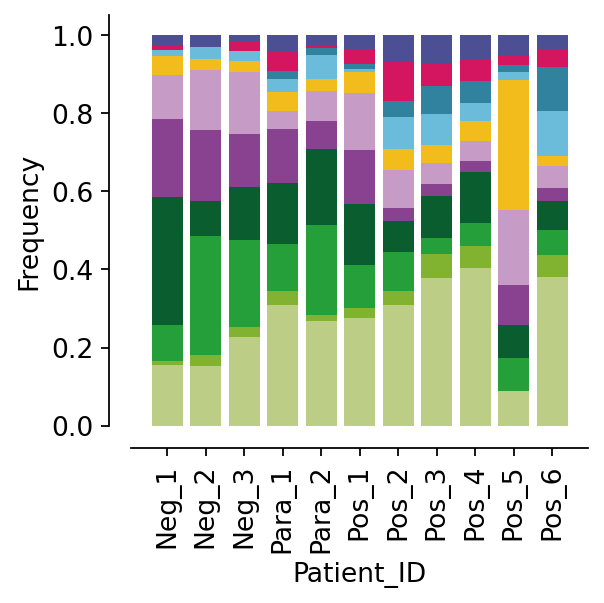

In [33]:
fig, ax = ov.utils.plot_cellproportion(adata=adata_CD4,celltype_clusters='Subcelltype',
                    visual_clusters='Patient_ID',
                    visual_name='Patient_ID',figsize=(4,4))
ax.set_ylabel('Frequency')
plt.savefig('Gastric/Figure/sFigure4/sFigure4_J.png', dpi=300,bbox_inches = 'tight')


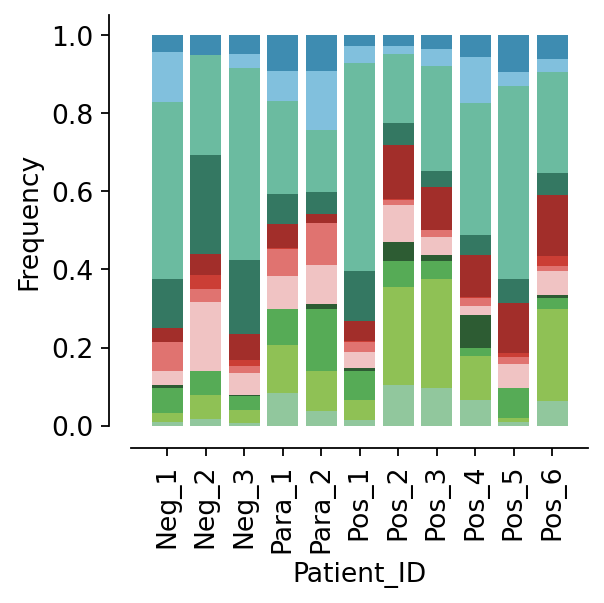

In [34]:
fig, ax = ov.utils.plot_cellproportion(adata=adata_CD8,celltype_clusters='Subcelltype',
                    visual_clusters='Patient_ID',
                    visual_name='Patient_ID',figsize=(4,4))
ax.set_ylabel('Frequency')
plt.savefig('Gastric/Figure/sFigure4/sFigure4_K.png', dpi=300,bbox_inches = 'tight')


In [18]:
help(ov.utils.embedding)

Help on function embedding in module omicverse.utils._scatterplot:

embedding(adata: anndata._core.anndata.AnnData, basis: str, *, color: Union[str, Sequence[str], NoneType] = None, gene_symbols: Union[str, NoneType] = None, use_raw: Union[bool, NoneType] = None, sort_order: bool = True, edges: bool = False, edges_width: float = 0.1, edges_color: Union[str, Sequence[float], Sequence[str]] = 'grey', neighbors_key: Union[str, NoneType] = None, arrows: bool = False, arrows_kwds: Union[Mapping[str, Any], NoneType] = None, groups: Union[str, NoneType] = None, components: Union[str, Sequence[str]] = None, dimensions: Union[Tuple[int, int], Sequence[Tuple[int, int]], NoneType] = None, layer: Union[str, NoneType] = None, projection: Literal['2d', '3d'] = '2d', scale_factor: Union[float, NoneType] = None, color_map: Union[matplotlib.colors.Colormap, str, NoneType] = None, cmap: Union[matplotlib.colors.Colormap, str, NoneType] = None, palette: Union[str, Sequence[str], cycler.Cycler, NoneType] =